In [1]:
#Import pandas 

import pandas as pd

In [2]:
#Creating dataframe but also able to pull in index values to add column names

index = ['QB', 'RB', 'WR']

df = pd.DataFrame({
    'A': [45, 28, 18],
    'B': [50, 13, 15] 
}, index=index)

In [3]:
#Returns the top 15 rows
df.head()

,A,B
QB,45,50
RB,28,13
WR,18,15


In [4]:
#Used to sum the dataframe

df.sum()

A    91
B    78
dtype: int64

In [5]:
#Import the csv file

df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/74b84c5fb2371b954b52b4f67ae5220930d57861/fantasypros/fp_projections.csv')

In [6]:
#Returns first 5 rows

df.head()

,Unnamed: 0,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,...,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.1
1,1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.1
2,2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.5
3,3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.7
4,4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.5


In [7]:
#Manipulating the dataframe to remove unamed row using iloc. semi-colon means return all rows and 1: means start with the player row.

df = df.iloc[:, 1:]

In [8]:
df.head()

,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,...,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
0,Lamar Jackson,BAL,QB,0.0,0.0,0.0,2.4,160.8,967.8,5.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,361.1
1,Patrick Mahomes,KC,QB,0.0,0.0,0.0,1.2,55.6,302.0,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,345.1
2,Dak Prescott,DAL,QB,0.0,0.0,0.0,2.3,64.4,261.4,3.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,318.5
3,Deshaun Watson,HOU,QB,0.0,0.0,0.0,1.8,92.9,491.2,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,312.7
4,Russell Wilson,SEA,QB,0.0,0.0,0.0,1.6,72.1,373.7,2.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,308.5


In [9]:
#Returns all the column names

df.columns

Index(['Player', 'Team', 'Pos', 'Receptions', 'ReceivingYds', 'ReceivingTD',
       'FL', 'RushingAtt', 'RushingYds', 'RushingTD', 'PassingAtt',
       'PassingCmp', 'PassingYds', 'PassingTD', 'Int', 'FieldGoalsMade',
       'FieldGoalsAttempted', 'ExtraPointsMade', 'TotalSacks', 'TotalInt',
       'FumblesRecovered', 'FumblesForced', 'DefensiveTDs', 'SafetysForced',
       'PointsAllowed', 'FantasyPoints'],
      dtype='object')

In [10]:
#Takes df.columns and adds a comma and space for easier reading.

', '.join(df.columns)

'Player, Team, Pos, Receptions, ReceivingYds, ReceivingTD, FL, RushingAtt, RushingYds, RushingTD, PassingAtt, PassingCmp, PassingYds, PassingTD, Int, FieldGoalsMade, FieldGoalsAttempted, ExtraPointsMade, TotalSacks, TotalInt, FumblesRecovered, FumblesForced, DefensiveTDs, SafetysForced, PointsAllowed, FantasyPoints'

In [11]:
#Create a dictionary with scoring points (PPR) in order to override the fantasy points column with new calculation. 
#Taking the dataframe columns and doing calculations from the values in the dictionary.

scoring_weights = {
    'receptions': 1, # PPR
    'receiving_yds': 0.1,
    'receiving_td': 6,
    'FL': -2, #fumbles lost
    'rushing_yds': 0.1,
    'rushing_td': 6,
    'passing_yds': 0.04,
    'passing_td': 4,
    'int': -2
}

df['FantasyPoints'] = (
    df['Receptions']*scoring_weights['receptions'] + df['ReceivingYds']*scoring_weights['receiving_yds'] + \
    df['ReceivingTD']*scoring_weights['receiving_td'] + df['FL']*scoring_weights['FL'] + \
    df['RushingYds']*scoring_weights['rushing_yds'] + df['RushingTD']*scoring_weights['rushing_td'] + \
    df['PassingYds']*scoring_weights['passing_yds'] + df['PassingTD']*scoring_weights['passing_td'] + \
    df['Int']*scoring_weights['int'] )

In [12]:
#Viewing the new fantasy points column.

df['FantasyPoints']

0      361.124
1      345.384
2      318.416
3      312.888
4      308.462
        ...   
681      0.000
682      0.000
683      0.000
684      0.000
685      0.000
Name: FantasyPoints, Length: 686, dtype: float64

In [13]:
#Locates and returns only players with the position of running back from our dataframe

rb_df = df.loc[df['Pos'] == 'RB']

In [14]:
rb_df.head()

,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,...,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
12,Christian McCaffrey,CAR,RB,102.8,855.8,4.5,2.2,252.7,1130.8,8.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.06
23,Saquon Barkley,NYG,RB,66.2,536.9,2.7,1.5,271.2,1237.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.79
25,Ezekiel Elliott,DAL,RB,59.3,468.6,2.6,2.6,288.0,1261.9,9.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299.75
26,Derrick Henry,TEN,RB,21.5,183.7,1.0,2.4,294.8,1481.1,12.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.78
30,Dalvin Cook,MIN,RB,58.1,519.8,1.9,2.7,262.7,1151.0,9.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,289.98


In [15]:
#Can also add a column indexer to return only rows you would like to see

rb_df = df.loc[df['Pos'] == 'RB', ['Player', 'Team', 'Pos', 'Receptions', 'ReceivingYds']]

In [16]:
rb_df.head()

,Player,Team,Pos,Receptions,ReceivingYds
12,Christian McCaffrey,CAR,RB,102.8,855.8
23,Saquon Barkley,NYG,RB,66.2,536.9
25,Ezekiel Elliott,DAL,RB,59.3,468.6
26,Derrick Henry,TEN,RB,21.5,183.7
30,Dalvin Cook,MIN,RB,58.1,519.8


In [17]:
#Sorts dataframe and returns top 15 in terms of rushing yards by ascending order. 
#It will default to descending if not set.

df.sort_values(by='RushingYds', ascending=False).head(15)

,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,...,FieldGoalsAttempted,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints
26,Derrick Henry,TEN,RB,21.5,183.7,1.0,2.4,294.8,1481.1,12.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.780
25,Ezekiel Elliott,DAL,RB,59.3,468.6,2.6,2.6,288.0,1261.9,9.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299.750
37,Nick Chubb,CLE,RB,24.8,191.5,1.1,2.1,275.4,1251.9,8.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224.940
23,Saquon Barkley,NYG,RB,66.2,536.9,2.7,1.5,271.2,1237.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.790
41,Josh Jacobs,LV,RB,28.5,222.1,0.8,2.0,267.4,1186.3,8.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.940
36,Joe Mixon,CIN,RB,39.7,306.2,1.7,1.8,269.5,1178.6,7.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,240.980
30,Dalvin Cook,MIN,RB,58.1,519.8,1.9,2.7,262.7,1151.0,9.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,289.980
12,Christian McCaffrey,CAR,RB,102.8,855.8,4.5,2.2,252.7,1130.8,8.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.060
45,Chris Carson,SEA,RB,31.5,245.1,1.3,2.4,244.0,1100.6,7.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215.870
38,Miles Sanders,PHI,RB,51.7,462.6,2.4,2.1,234.7,1050.6,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249.220


In [18]:
#Returns summary statistics for dataset from dataframe.

rb_df = df.loc[df['Pos'] == 'RB']

rb_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Receptions,155.0,17.506452,18.480993,0.40,4.05,10.60,24.000,102.80
ReceivingYds,155.0,140.300645,153.581122,3.10,30.30,85.70,198.100,855.80
ReceivingTD,155.0,0.708387,0.882143,0.00,0.10,0.30,1.000,4.50
FL,155.0,0.712903,0.757106,0.00,0.00,0.50,1.300,2.70
RushingAtt,155.0,78.225161,82.304474,0.00,6.75,46.70,137.900,294.80
RushingYds,155.0,334.525161,359.322937,2.50,45.80,176.70,559.900,1481.10
RushingTD,155.0,2.428387,2.723008,0.00,0.30,1.20,3.900,12.10
PassingAtt,155.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00
PassingCmp,155.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00
PassingYds,155.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00


In [19]:
#Series functions. In order to run copy and paste to a single line.

rb_df['RushingAtt'].max()
rb_df['RushingAtt'].std()
rb_df['RushingAtt'].min()
rb_df['RushingAtt'].quantile(0.60)
rb_df['RushingAtt'].quantile(0.20)

4.5

In [20]:
#Addings a new column to the dataframe and then ranking.

rb_df['RushingTDRank'] = rb_df['RushingTD'].rank(ascending=False)

C:\Users\dymar\AppData\Local\Temp/ipykernel_15032/2514464722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rb_df['RushingTDRank'] = rb_df['RushingTD'].rank(ascending=False)


In [21]:
rb_df.head()

,Player,Team,Pos,Receptions,ReceivingYds,ReceivingTD,FL,RushingAtt,RushingYds,RushingTD,...,ExtraPointsMade,TotalSacks,TotalInt,FumblesRecovered,FumblesForced,DefensiveTDs,SafetysForced,PointsAllowed,FantasyPoints,RushingTDRank
12,Christian McCaffrey,CAR,RB,102.8,855.8,4.5,2.2,252.7,1130.8,8.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,375.06,8.0
23,Saquon Barkley,NYG,RB,66.2,536.9,2.7,1.5,271.2,1237.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.79,5.0
25,Ezekiel Elliott,DAL,RB,59.3,468.6,2.6,2.6,288.0,1261.9,9.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,299.75,3.0
26,Derrick Henry,TEN,RB,21.5,183.7,1.0,2.4,294.8,1481.1,12.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.78,1.0
30,Dalvin Cook,MIN,RB,58.1,519.8,1.9,2.7,262.7,1151.0,9.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,289.98,2.0


In [22]:
#Sorting by RushingTDRank and then returning top 15 with only player.

rb_df.sort_values(by='RushingTDRank').head(15)['Player']

26            Derrick Henry
30              Dalvin Cook
25          Ezekiel Elliott
39              Aaron Jones
23           Saquon Barkley
37               Nick Chubb
41              Josh Jacobs
12      Christian McCaffrey
35    Clyde Edwards-Helaire
33             Alvin Kamara
48              Todd Gurley
45             Chris Carson
36                Joe Mixon
42             Kenyan Drake
77           Raheem Mostert
Name: Player, dtype: object

In [23]:
"""
The value_counts is a Series method can be used to find the number of occurances in a column.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
Notice that the value_counts method is for Series', not DataFrames.
"""
# not running the output as it's too large.
rb_df['RushingAtt'].value_counts()

0.0      7
3.7      2
4.5      2
10.4     2
4.9      2
        ..
47.8     1
211.7    1
49.3     1
28.2     1
70.0     1
Name: RushingAtt, Length: 138, dtype: int64

C:\Users\dymar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


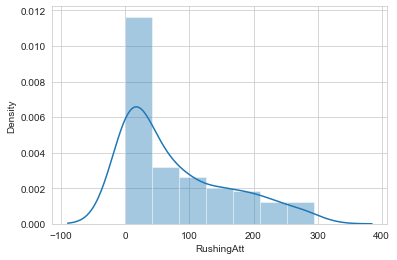

In [24]:
"""
We can also visualize this data in the same fashion.
"""
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(rb_df['RushingAtt']);

In [25]:
adp_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/fantasypros/adp/PPR_ADP.csv', index_col=0)

In [26]:
adp_df.head(15)

,PLAYER,POS,AVG
0,Christian McCaffrey,RB,1.0
1,Saquon Barkley,RB,2.0
2,Ezekiel Elliott,RB,3.5
3,Michael Thomas,WR,4.0
4,Dalvin Cook,RB,5.0
5,Alvin Kamara,RB,5.5
6,Derrick Henry,RB,7.5
7,Davante Adams,WR,9.5
8,Joe Mixon,RB,10.0
10,Austin Ekeler,RB,12.0


In [27]:
adp_df['ADP RANK'] = adp_df['AVG'].rank()

In [28]:
adp_df.head()

,PLAYER,POS,AVG,ADP RANK
0,Christian McCaffrey,RB,1.0,1.0
1,Saquon Barkley,RB,2.0,2.0
2,Ezekiel Elliott,RB,3.5,3.0
3,Michael Thomas,WR,4.0,4.0
4,Dalvin Cook,RB,5.0,5.0


In [29]:
#How many lines our dataframe has

adp_df.shape

(375, 4)

In [30]:
#Limits the dataframe to 100 rows

adp_df_cutoff = adp_df[:100]

In [31]:
adp_df_cutoff.shape

(100, 4)

In [32]:
# Initialize an empty dictionary. This is where we are going to save our replacement players

replacement_players = {
    'QB': '',
    'RB': '',
    'WR': '',
    'TE': ''
}

for _, row in adp_df_cutoff.iterrows():
    
    position = row['POS'] # extract out the position and player value from each row as we loop through it
    player = row['PLAYER']
    
    if position in replacement_players: # if the position is in the dict's keys
        replacement_players[position] = player # set that player as the replacement player


In [33]:
replacement_players

{'QB': 'Aaron Rodgers',
 'RB': 'Latavius Murray',
 'WR': 'Jamison Crowder',
 'TE': 'Rob Gronkowski'}

In [34]:
#Pulling out columns we want from the dataframe.

df = df[['Player', 'Pos', 'Team', 'FantasyPoints']]

In [35]:
df.head()

,Player,Pos,Team,FantasyPoints
0,Lamar Jackson,QB,BAL,361.124
1,Patrick Mahomes,QB,KC,345.384
2,Dak Prescott,QB,DAL,318.416
3,Deshaun Watson,QB,HOU,312.888
4,Russell Wilson,QB,SEA,308.462


In [36]:
#Creating an empty dictionary and then finding the players total fantasy points

replacement_values = {}

for position, player_name in replacement_players.items():
    player = df.loc[df['Player'] == player_name]
    replacement_values[position] = player['FantasyPoints'].tolist()[0]

In [37]:
replacement_values

{'QB': 277.432, 'RB': 118.62, 'WR': 192.27999999999997, 'TE': 139.5}

In [38]:
pd.set_option('chained_assignment', None)

df = df.loc[df['Pos'].isin(['QB', 'RB', 'WR', 'TE'])]


df['VOR'] = df.apply(
    lambda row: row['FantasyPoints'] - replacement_values.get(row['Pos']), axis=1
)

In [39]:
df.head()

,Player,Pos,Team,FantasyPoints,VOR
0,Lamar Jackson,QB,BAL,361.124,83.692
1,Patrick Mahomes,QB,KC,345.384,67.952
2,Dak Prescott,QB,DAL,318.416,40.984
3,Deshaun Watson,QB,HOU,312.888,35.456
4,Russell Wilson,QB,SEA,308.462,31.030


In [40]:
pd.set_option('display.max_rows', None) # turn off truncation of rows setting inherent to pandas

df['VOR Rank'] = df['VOR'].rank(ascending=False)
df.sort_values(by='VOR', ascending=False).head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
12,Christian McCaffrey,RB,CAR,375.060,256.440,1.0
23,Saquon Barkley,RB,NYG,310.790,192.170,2.0
25,Ezekiel Elliott,RB,DAL,299.750,181.130,3.0
33,Alvin Kamara,RB,NO,295.950,177.330,4.0
30,Dalvin Cook,RB,MIN,289.980,171.360,5.0
26,Derrick Henry,RB,TEN,261.780,143.160,6.0
34,Michael Thomas,WR,NO,333.180,140.900,7.0
35,Clyde Edwards-Helaire,RB,KC,254.230,135.610,8.0
43,Austin Ekeler,RB,LAC,252.900,134.280,9.0
38,Miles Sanders,RB,PHI,249.220,130.600,10.0


In [41]:
"""
the pandas groupby method allows us to groupby a specific column, called "splitting",
then apply a summary function over to each group. We can split this up by column as well, by tacking
on ['ColumName'] after grouping and before applying the summary function.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
"""

df.groupby('Pos')['VOR'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,89.0,-176.720337,122.762942,-277.432,-272.7440,-265.39,-33.736,83.692
RB,155.0,-36.236129,83.097178,-117.570,-103.8800,-64.80,6.765,256.440
TE,128.0,-81.878203,54.454555,-139.500,-122.0725,-104.45,-50.840,115.940
WR,245.0,-114.184694,79.501235,-192.280,-181.1000,-151.34,-52.910,140.900


In [42]:
# standard score example. Notice axis is not set to 1 as we are applying a function across a column here.
# df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].mean()) / df['VOR'].std())

df['VOR'] = df['VOR'].apply(lambda x: (x - df['VOR'].min()) / (df['VOR'].max() - df['VOR'].min()))

In [43]:
df = df.sort_values(by='VOR Rank')
df.head(100)

,Player,Pos,Team,FantasyPoints,VOR,VOR Rank
12,Christian McCaffrey,RB,CAR,375.060,1.000000,1.0
23,Saquon Barkley,RB,NYG,310.790,0.879615,2.0
25,Ezekiel Elliott,RB,DAL,299.750,0.858936,3.0
33,Alvin Kamara,RB,NO,295.950,0.851818,4.0
30,Dalvin Cook,RB,MIN,289.980,0.840636,5.0
26,Derrick Henry,RB,TEN,261.780,0.787814,6.0
34,Michael Thomas,WR,NO,333.180,0.783581,7.0
35,Clyde Edwards-Helaire,RB,KC,254.230,0.773672,8.0
43,Austin Ekeler,RB,LAC,252.900,0.771181,9.0
38,Miles Sanders,RB,PHI,249.220,0.764288,10.0


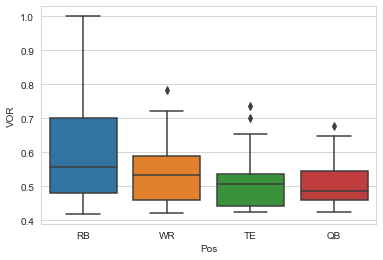

In [44]:
import seaborn as sns # in case you did not import it above

# calculating how many players are in our draft pool.
num_teams = 12
num_spots = 16 # 1 QB, 2RB, 2WR, 1TE, 1FLEX, 1K, 1DST, 7 BENCH
draft_pool = num_teams * num_spots

df_copy = df[:draft_pool]

sns.boxplot(x=df_copy['Pos'], y=df_copy['VOR']);

In [45]:
# let's rename our VOR column to just Value.
# remember, to make a change to our DataFrame, you set it equal to itself + some modifcation
# we can use the rename method here to help us do that
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

df = df.rename({
    'VOR': 'Value',
    'VOR Rank': 'Value Rank'
}, axis=1) # axis = 1 means make the change along the column axis.

In [46]:
adp_df = adp_df.rename({
    'PLAYER': 'Player',
    'POS': 'Pos',
    'AVG': 'Average ADP',
    'ADP RANK': 'ADP Rank'
}, axis=1) # let's rename some columns first.

In [47]:
# merge function allows us to combine DataFrames together column wise on common columns.
#Here, we are left joining. Which means any entries that exist in the right table (adp_df) but
#do not exist in the left table (df) get dropped from the final table.
#We want to join the two DataFrames together where the Player and Pos columns match up.
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

final_df = df.merge(adp_df, how='left', on=['Player', 'Pos'])

final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank
0,Christian McCaffrey,RB,CAR,375.06,1.000000,1.0,1.0,1.0
1,Saquon Barkley,RB,NYG,310.79,0.879615,2.0,2.0,2.0
2,Ezekiel Elliott,RB,DAL,299.75,0.858936,3.0,3.5,3.0
3,Alvin Kamara,RB,NO,295.95,0.851818,4.0,5.5,6.0
4,Dalvin Cook,RB,MIN,289.98,0.840636,5.0,5.0,5.0


In [48]:
# let's calculate the difference between our value rank and adp rank
final_df['Diff in ADP and Value'] = final_df['ADP Rank'] - final_df['Value Rank']
final_df.head()

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
0,Christian McCaffrey,RB,CAR,375.06,1.000000,1.0,1.0,1.0,0.0
1,Saquon Barkley,RB,NYG,310.79,0.879615,2.0,2.0,2.0,0.0
2,Ezekiel Elliott,RB,DAL,299.75,0.858936,3.0,3.5,3.0,0.0
3,Alvin Kamara,RB,NO,295.95,0.851818,4.0,5.5,6.0,2.0
4,Dalvin Cook,RB,MIN,289.98,0.840636,5.0,5.0,5.0,0.0


In [49]:
draft_pool = final_df.sort_values(by='ADP Rank')[:196]

rb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'RB']
qb_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'QB']
wr_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'WR']
te_draft_pool = draft_pool.loc[draft_pool['Pos'] == 'TE']

In [50]:
# top 10 RB sleepers for this year's draft
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=False)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
65,Ryquell Armstead,RB,JAC,140.35,0.560363,66.0,138.5,136.0,70.0
80,Antonio Gibson,RB,WAS,129.26,0.539590,81.0,141.0,140.0,59.0
138,Darrynton Evans,RB,TEN,90.65,0.467269,139.0,193.5,191.0,52.0
30,Ronald Jones II,RB,TB,179.79,0.634238,31.0,83.0,78.0,47.0
35,Tarik Cohen,RB,CHI,171.24,0.618223,36.0,87.5,83.0,47.0
74,Duke Johnson,RB,HOU,134.83,0.550023,75.0,125.0,121.0,46.0
104,Adrian Peterson,RB,WAS,114.31,0.511587,105.0,147.0,147.0,42.0
58,Kerryon Johnson,RB,DET,149.42,0.577352,59.0,100.0,98.5,39.5
40,James White,RB,NE,166.68,0.609682,41.0,75.5,74.0,33.0
33,Kareem Hunt,RB,CLE,174.14,0.623655,34.0,60.0,64.5,30.5


In [51]:
# top 10 RB overvalued for this year's draft
rb_draft_pool.sort_values(by='Diff in ADP and Value', ascending=True)[:10]

,Player,Pos,Team,FantasyPoints,Value,Value Rank,Average ADP,ADP Rank,Diff in ADP and Value
230,Justice Hill,RB,BAL,37.94,0.368538,231.0,202.0,200.0,-31.0
202,Rashaad Penny,RB,SEA,57.46,0.405101,203.0,181.0,179.0,-24.0
128,Ke'Shawn Vaughn,RB,TB,100.07,0.484914,129.0,108.5,110.0,-19.0
132,Alexander Mattison,RB,MIN,95.05,0.475511,133.0,123.0,118.0,-15.0
108,Sony Michel,RB,NE,111.23,0.505818,109.0,96.5,95.0,-14.0
96,J.K. Dobbins,RB,BAL,119.25,0.520840,97.0,88.0,85.5,-11.5
223,Jaylen Samuels,RB,PIT,40.89,0.374063,224.0,214.0,216.0,-8.0
172,A.J. Dillon,RB,GB,72.61,0.433478,173.0,166.5,166.5,-6.5
188,Damien Harris,RB,NE,66.53,0.422090,189.0,187.0,185.0,-4.0
11,Joe Mixon,RB,CIN,240.98,0.748854,12.0,10.0,9.0,-3.0
